                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     69.33
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           5.07e-13
Time:                        13:45:28   Log-Likelihood:                -203.42
No. Observations:                 100   AIC:                             410.8
Df Residuals:                      98   BIC:                             416.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9966      0.371      2.686      0.0

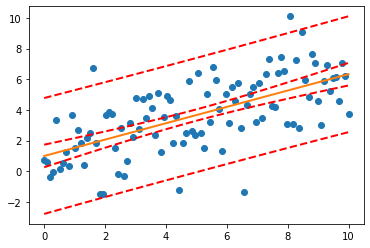

In [5]:
import re
from statsmodels.stats.outliers_influence import summary_table
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

n = 100

x = np.linspace(0, 10, n)
e = np.random.normal(size=n)
y = 1 + 0.5*x + 2*e
X = sm.add_constant(x)

re = sm.OLS(y, X).fit()
print(re.summary())

prstd, iv_l, iv_u = wls_prediction_std(re)

st, data, ss2 = summary_table(re, alpha=0.05)


fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

# Check we got the right things
print(np.max(np.abs(re.fittedvalues - fittedvalues)))
print(np.max(np.abs(iv_l - predict_ci_low)))
print(np.max(np.abs(iv_u - predict_ci_upp)))

plt.plot(x, y, 'o')
plt.plot(x, fittedvalues, '-', lw=2)
plt.plot(x, predict_ci_low, 'r--', lw=2)
plt.plot(x, predict_ci_upp, 'r--', lw=2)
plt.plot(x, predict_mean_ci_low, 'r--', lw=2)
plt.plot(x, predict_mean_ci_upp, 'r--', lw=2)
plt.show()

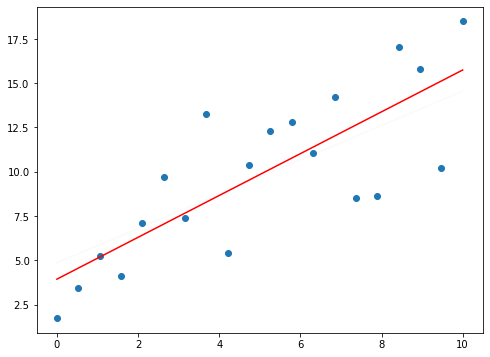

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
 
# Generate some data
x = np.linspace(0, 10, 20)
X = np.vstack([x, np.ones(len(x))]).T
y = x + (np.random.rand(len(x)) * 10)
 
#Plot every model
plt.figure(figsize=(8,6))
for i in range(0, 1000):
    sample_index = np.random.choice(range(0, len(y)), len(y))
 
#Fit new model on sub-sample of data
X_samples = X[sample_index]
y_samples = y[sample_index]
lr = LinearRegression()
lr.fit(X_samples, y_samples)
plt.plot(x, lr.predict(X), color='lightgrey', alpha=0.1)
 
plt.scatter(x,y, marker='o', zorder=4)
 
#Fit model in all data
lr = LinearRegression()
lr.fit(X, y)
plt.plot(x, lr.predict(X), color='red', zorder=5)

array([ 5.20331497,  5.66123888,  6.1191628 ,  6.57708672,  7.03501064,
        7.49293456,  7.95085847,  8.40878239,  8.86670631,  9.32463023,
        9.78255415, 10.24047806, 10.69840198, 11.1563259 , 11.61424982,
       12.07217374, 12.53009765, 12.98802157, 13.44594549, 13.90386941])

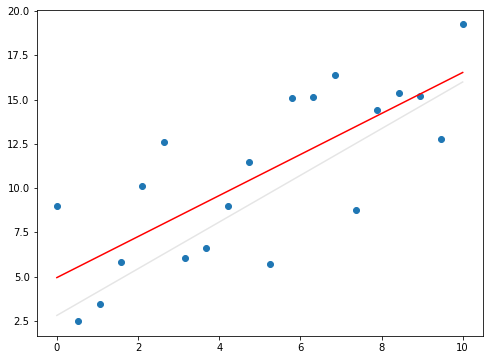

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
 
# Generate some data
x = np.linspace(0, 10, 20)
X = np.vstack([x, np.ones(len(x))]).T
y = x + (np.random.rand(len(x)) * 10)
 
#Plot every model
plt.figure(figsize=(8,6))
for i in range(0, 1000):
    sample_index = np.random.choice(range(0, len(y)), len(y))
 
#Fit new model on sub-sample of data
X_samples = X[sample_index]
y_samples = y[sample_index]
lr = LinearRegression()
lr.fit(X_samples, y_samples)
plt.plot(x, lr.predict(X), color='black', alpha=0.1)
 
plt.scatter(x,y, marker='o', zorder=4)
 
#Fit model in all data
lr = LinearRegression()
lr.fit(X, y)
plt.plot(x, lr.predict(X), color='red', zorder=5)


In [18]:
from sklearn.model_selection import train_test_split
# split the data in train and validation set 

X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5) 

# base_model can be any regression model, a 
# sklearn.ensemble.GradientBoostingRegressor for instance 

base_model.fit(X1, y1) 

base_prediction = base_model.predict(X2) 

# compute the prediction error vector on the validation set 

validation_error = (base_prediction - y2) ** 2 

error_model.fit(X2, validation_error) 

# compute the mean and standard deviation of the distribution 

mean = base_model.predict(X_test) 

st_dev = error_model.predict(X_test)**0.5	

NameError: name 'base_model' is not defined